# Load data

In [47]:
import pandas as pd

In [48]:
df = pd.read_csv("/content/data_final_v6.csv", encoding = 'utf-8')
# To display the top 5 rows
df.head(5)

,Links,Tieu_de,Description,Noi_dung_tin_bai,golden_subtopic,subtopic,frequency
0,https://baotainguyenmoitruong.vn/kinh-te-bien-...,Kinh tế biển làm động lực để Trà Vinh phát tri...,Văn phòng Chính phủ vừa ban hành Thông báo số ...,Văn phòng Chính phủ vừa ban hành Thông báo số ...,Biển - hải đảo,['Biển - hải đảo'],[6]
1,https://baotainguyenmoitruong.vn/thu-hep-vung-...,"'Thu hẹp vùng biển xám, mở rộng vùng biển xanh'","Sáng 25/10, Hội thảo khoa học quốc tế về Biển ...","Sáng 25/10, Hội thảo khoa học quốc tế về Biển ...",Biển - hải đảo,"['Thông tin chung', 'Biển - hải đảo']","[19, 3]"
2,https://baotainguyenmoitruong.vn/ninh-hai-ninh...,Ninh Hải - Ninh Thuận: Mang đại dương gần cuộc...,Mang đại dương gần cuộc sống,(TN&MT) - Ninh Thuận là tỉnh vùng cực Nam Trun...,Biển - hải đảo,['Biển - hải đảo'],[8]
3,https://baotainguyenmoitruong.vn/quang-ngai-ta...,Quảng Ngãi: Tăng cường bảo vệ hành lang bờ biển,(TN&MT) - Quảng Ngãi là tỉnh đầu tiên của cả n...,(TN&MT) - Quảng Ngãi là tỉnh đầu tiên của cả n...,Biển - hải đảo,['Biển - hải đảo'],[8]
4,https://baotainguyenmoitruong.vn/ninh-thuan-ph...,Ninh Thuận phát triển năng động với kinh tế bi...,Phó Thủ tướng Trần Hồng Hà vừa ký Quyết định s...,Phó Thủ tướng Trần Hồng Hà vừa ký Quyết định s...,Biển - hải đảo,['Biển - hải đảo'],[7]


## Preprocessing column Linh vuc

In [49]:
df['golden_subtopic'].replace('môi trường',            'Môi trường'            , inplace=True)
df['golden_subtopic'].replace('địa chất - khoáng sản', 'Địa chất - Khoáng sản' , inplace=True)
df['golden_subtopic'].replace('biển - hải đảo',        'Biển - hải đảo'        , inplace=True)
df['golden_subtopic'].replace('đất đai',               'Đất đai'               , inplace=True)
df['golden_subtopic'].replace('nước',                  'Tài nguyên nước'       , inplace=True)
df['golden_subtopic'].replace('chung',                  'Thông tin chung'       , inplace=True)
df['golden_subtopic'].replace('thông tin chung',        'Thông tin chung'       , inplace=True)
df['golden_subtopic'].replace('đo đạc bản đồ',        'Đo đạc và bản đồ'       , inplace=True)

# Create keyword dict for each subtopic

In [53]:
dict_sub_topic_v5 = {
    "Đo đạc và bản đồ"  : ["đo đạc và bản đồ", "cục đo đạc, bản đồ",
                           "đo đạc", "bản đồ", "đo đạc", "bản đồ",
                           "thông tin địa lý", "dữ liệu địa không gian", "địa giới hành chính",
                           "dữ liệu địa lý quốc gia", "luật đo đạc và bản đồ",
                           "thông tin địa lý", "dữ liệu địa không gian", "địa giới hành chính",
                           "dữ liệu địa lý quốc gia", "luật đo đạc và bản đồ",
                           "tọa độ", "tọa độ", "địa hình", "biên giới"],
    # giảm threshold đo đạc bản đồ xuống 5
    "Đa dạng sinh học"  : ["đa dạng sinh học", "đa dạng sinh học", "ĐDSH", "ĐDSH", "hệ sinh thái", "môi trường sinh thái",
                           "động vật hoang dã", "đvhd", "đvhd",  "hoang dã" , "bttn", "bảo tồn thiên nhiên"
                            "trái phép đvhd", "rừng ngập mặn", "thú rừng" , "thú rừng" ,
                           "vườn quốc gia", "bảo tồn", "san hô", "di cư", "hổ",
                            "danh mục loài", "nguy cấp, quý, hiếm", "trung tâm cứu hộ bảo tồn và phát triển sinh vật",
                            "voọc", "UNESCO"],
    # giảm threshold Đa dạng sinh học xuống 5
    "Viễn thám"         : ["viễn thám", "hệ thống giám sát", "vệ tinh",
                           "viễn thám", "phần mềm giám sát", "vệ tinh",
                           "viễn thám", "giám sát", "vệ tinh"],

    "Tài nguyên nước"   : ["luật tài nguyên nước", "luật thủy lợi", "96/2018/NĐ-CP", "luật cấp thoát nước",
                           "luật tài nguyên nước", "luật thủy lợi", "96/2018/NĐ-CP", "luật cấp thoát nước",
                           "nguồn nước", "hồ chứa nước",  "nhà máy nước", "nước sạch", "tài nguyên nước",  "thủy lợi",
                           "nguồn nước", "hồ chứa nước",  "nhà máy nước", "nước sạch", "tài nguyên nước",  "thủy lợi",
                           "nước thải", "hạn hán", "nước ngầm", "nước ngầm", "nước sinh hoạt", "xâm nhập mặn",
                           "ô nhiễm nước", "ô nhiễm nguồn nước", "hệ thống cấp nước",
                           "xử lý nước thải", "lưu vực", "hậu giang",
                           "lòng sông", "hạ lưu", "nước ngọt"],

    "Biển - hải đảo"    : ["khu vực biển", "biển và hải đảo", "đảo", "đại dương", "kinh tế biển", "y tế biển", "rác thải nhựa",
                           "biển cả", "hải đảo", "cảnh sát biển", "bảo tồn biển", "biển đảo", "trường sa", "hoàng sa", "san hô",
                           "bảo vệ chủ quyền", "chiến sỹ", "biển đảo", "thủy sản", "côn đảo", "cù lao", "chủ quyền", "quốc phòng",
                           "vùng biển nuôi", "hải lý", "cảng", "tàu", "giàn", "vịnh"],

    "Đất đai"           : [ "giải phóng mặt bằng", "mặt bằng", "giá đất", "bất động sản",
                            "phân lô", "bán nền",  "phân lô", "bán nền",
                            "đất nông nghiệp", "đất lâm nghiệp", "đất bãi sông", "đất lâm nghiệp",
                            "đất khai hoang", "đất nền", "đất khai hoang", "đất công",
                            "cấp phép xây dựng", "đất đai",
                            "đất nông nghiệp", "đất lâm nghiệp", "đất bãi sông", "đất lâm nghiệp",
                            "đất khai hoang", "đất nền", "đất khai hoang", "đất công",
                            "cấp phép xây dựng", "đất đai",
                            "sổ hồng", "sổ hồng",  "sổ đỏ", "sổ đỏ",
                            "quyền sử dụng đất",  "quyền sử dụng đất",
                            "tái định cư", "luật đất đai (sửa đổi)", "luật đất đai", "luật đất đai",
                            "thu hồi đất",  "chủ đất",
                            "thửa đất", "hecta", "chiếm đất", "điện gió", "chủ đầu tư",
                            "nhà máy điện", "cao tốc", "giấy phép xây dựng"],

    "Địa chất - Khoáng sản" : ["mỏ", "khoáng sản",  "khoáng sản", "cát", "đá",
                               "quặng", "than", "địa chất",  "quặng", "than", "địa chất",
                               "sỏi", "sỏi", "vôi", "vôi", "dầu mỏ",  "dầu mỏ", "đất hiếm",
                               "cát tặc", "sắt", "tội phạm", "vlxd", "đmt"],

    # precision kém, recall kém
    "Khí tượng thủy văn - Biến đổi khí hậu" : ["hạn hán", "biến đổi khí hậu", "biến đổi khí hậu", "bđkh", "bđkh",
                                               "CO2", "khí tượng", "thủy văn", "khí tượng", "thủy văn", "carbon",
                                               "ozone", "mưa", "khí nhà kính", "khí nhà kính", "hiệu ứng nhà kính",
                                               "rét hại", "hiệu ứng nhà kính", "carbon dioxide", "thủy triều",
                                               "khí methane", "động đất", "núi lửa", "mùa khô",
                                               "ngập nước", "khô hạn", "thiên tai", "sạt lở",
                                               "qpt", "lũ", "rét",  "tbnn"],

    "Môi trường"        : ["rác thải", "rác", "nước thải", "ô nhiễm", "cây xanh", "xử lý rác", "bảo vệ môi trường",
                           "xử lý nước", "vứt rác", "tái chế", "xử lý chất thải", "chất thải rắn",
                           "chất thải nhựa", "môi trường", "thạch thất", "hữu bằng", "tái chế", "sức khỏe", "viêm",
                            "đốt" ,"ung thư","vỉa hè","ống khói","rơm rạ","vệ sinh"],

    "Quản lý chất thải rắn" : ["ctrsh", "chất thải rắn", "chất thải rắn sinh hoạt", "xử lý rác thải",
                               "rác thải nhựa", "chất thải nhựa", "phân loại rác", "xử lý chất thải",
                               "ctrsh", "chất thải rắn", "chất thải rắn sinh hoạt", "xử lý rác thải",
                               "rác thải nhựa", "chất thải nhựa", "phân loại rác", "xử lý chất thải",
                               "chất thải", "tái chế", "ô nhiễm nhựa", "rác thải", "nhựa", "nilon", "lò đốt rác"],

    "Thông tin chung": ["thủ tướng", "bộ trưởng", "thanh tra", "chính phủ", "hội nghị",
                        "quốc tế", "toàn cầu", "song phương",
                        "quốc tế", "toàn cầu", "song phương",
                        "đối tác", "UAE", "SDĐ", "JETP"],

    "Luật sửa đổi - Aspect": [
          "Luật Địa chất và Khoáng sản",
          "Luật Đất đai",
          "Luật Lưu trữ",
          "Luật Tài nguyên nước",
          "Luật Địa chất và Khoáng sản (sửa đổi)",
          "Luật Đất đai (sửa đổi)",
          "Luật Lưu trữ (sửa đổi)",
          "Luật Tài nguyên nước (sửa đổi)",
          "Luật Cấp thoát nước",
          "Luật Bảo vệ môi trường",
          "Luật Đa dạng sinh học",
          "Luật Phòng, chống thiên tai",
          "Luật Đê điều sửa đổi",
          "Luật Đo đạc và bản đồ",
          "Luật Thủy sản",
          "Luật Lâm nghiệp",
          "Luật điện lực sửa đổi",
          "Luật Khoáng sản",
          "Luật Tài nguyên, môi trường biển và hải đảo"


          "Dự thảo Luật Đất đai",

          "Dự thảo Luật",
          "Dự án Luật",
          "Dự thảo Nghị định",
          "Hồ sơ Luật",
          "xây dựng luật",
          "xây dựng luật, pháp lệnh",

          "sửa đổi, bổ sung",
          "chương trình xây dựng luật, pháp lệnh",
          "nghị quyết",
          "hoàn thiện luật",
          "ban soạn thảo",
          "cơ quan soạn thảo"

      ]
    }

# Create threshold for each subtopic

In [55]:
# Assuming thresholds is defined as follows:
thresholds_v4 = {
    "Đo đạc và bản đồ": 10,
    "Đa dạng sinh học": 15,
    "Viễn thám": 10,
    "Tài nguyên nước": 15,
    "Biển - hải đảo": 15,
    "Đất đai": 20,
    "Địa chất - Khoáng sản": 15,
    "Khí tượng thủy văn - Biến đổi khí hậu": 15,
    "Môi trường": 20,
    "Quản lý chất thải rắn": 15,
    "Thông tin chung": 10,
    "Luật sửa đổi - Aspect": 10
}


In [56]:
df = df.dropna()

In [57]:
df["Noi_dung_tin_bai"]

0       Văn phòng Chính phủ vừa ban hành Thông báo số ...
1       Sáng 25/10, Hội thảo khoa học quốc tế về Biển ...
2       (TN&MT) - Ninh Thuận là tỉnh vùng cực Nam Trun...
3       (TN&MT) - Quảng Ngãi là tỉnh đầu tiên của cả n...
4       Phó Thủ tướng Trần Hồng Hà vừa ký Quyết định s...
                              ...                        
1264    Theo ông Nhữ Văn Cẩn, Vụ trưởng Vụ Nuôi trồng ...
1265    Theo ông Nguyễn Quốc Khánh, Cục trưởng Cục Viễ...
1266    Theo ông Đặng Thái Hùng, Giám đốc Trung tâm Tr...
1267    Theo ông Hoàng Minh Hải, Chủ nhiệm đề tài, nhó...
1268    Trượt lở đất đá là một trong những loại hình t...
Name: Noi_dung_tin_bai, Length: 1269, dtype: object

In [58]:
df["golden_subtopic"]

0       Biển - hải đảo
1       Biển - hải đảo
2       Biển - hải đảo
3       Biển - hải đảo
4       Biển - hải đảo
             ...      
1264         Viễn thám
1265         Viễn thám
1266         Viễn thám
1267         Viễn thám
1268         Viễn thám
Name: golden_subtopic, Length: 1269, dtype: object

In [60]:
import re

def count_sub_topics_v5(text, golden_subtopic, thresholds):
    text = text.lower()
    sub_topic_count = {key: 0 for key in dict_sub_topic_v5.keys()}
    for key, values in dict_sub_topic_v5.items():
        for value in values:
            value = value.lower()
            count = text.count(value)
            sub_topic_count[key] += count
    text_length = len(text.split(' '))
    frq_golden_subtopic = sub_topic_count[golden_subtopic]
    frq_law = sub_topic_count["Luật sửa đổi - Aspect"]

    # custom thresholds
     # Custom thresholds
    new_subtopic = []
    for key, count in sub_topic_count.items():
        if count >= thresholds.get(key, 0):
            if count >= frq_golden_subtopic / 3.5:
                new_subtopic.append(key)

    # Add golden_subtopic if it's not already in new_subtopic
    if golden_subtopic not in new_subtopic:
        new_subtopic.append(golden_subtopic)
        df.at[golden_subtopic, 'is_in'] = "False"

    else:
        df.at[golden_subtopic, 'is_in'] = "True"


    # Filter out keys with count greater than thresholds
    frequencies = [sub_topic_count[key] for key in new_subtopic]

    return new_subtopic, frequencies, frq_golden_subtopic, frq_law, text_length

# Apply the function to each row of the DataFrame
df[['subtopic', 'frequency', 'frq_golden_subtopic', "frq_law", "text_length"]] = \
  df.apply(lambda row: pd.Series(count_sub_topics_v5(row['Noi_dung_tin_bai'], row['golden_subtopic'], thresholds_v4)), axis=1)

In [61]:
def check_in_new_column(row):
    if row['frq_golden_subtopic'] >= 10:
        return True
    else:
        return False

# Apply the function to each row of the DataFrame
df['is_in_new'] = df.apply(check_in_new_column, axis=1)

# export final data and evaluate result

## export final df

In [ ]:
file_path = 'data_aspect_law_.xlsx'

# Save the DataFrame to an Excel file
df.to_excel(file_path, index=False)

print("DataFrame saved to Excel successfully.")

DataFrame saved to Excel successfully.


In [64]:
df.head(2)

,Links,Tieu_de,Description,Noi_dung_tin_bai,golden_subtopic,subtopic,frequency,is_in,frq_golden_subtopic,frq_law,text_length,is_in_new
0,https://baotainguyenmoitruong.vn/kinh-te-bien-...,Kinh tế biển làm động lực để Trà Vinh phát tri...,Văn phòng Chính phủ vừa ban hành Thông báo số ...,Văn phòng Chính phủ vừa ban hành Thông báo số ...,Biển - hải đảo,[Biển - hải đảo],[6],NaN,6.0,3.0,1459.0,False
1,https://baotainguyenmoitruong.vn/thu-hep-vung-...,"'Thu hẹp vùng biển xám, mở rộng vùng biển xanh'","Sáng 25/10, Hội thảo khoa học quốc tế về Biển ...","Sáng 25/10, Hội thảo khoa học quốc tế về Biển ...",Biển - hải đảo,"[Thông tin chung, Biển - hải đảo]","[19, 3]",NaN,3.0,0.0,1479.0,False


## evaluate result

In [ ]:
print("Version 7: ")
print("May 7th - 11:40 PM")
result_df

Version 7: 
May 7th - 11:40 PM


is_in_new,golden_subtopic,numTrue,numFalse,Total,RatioTrue
0,Biển - hải đảo,106,19,125,0.848000
1,Khí tượng thủy văn - Biến đổi khí hậu,38,22,60,0.633333
2,Môi trường,190,60,250,0.760000
3,Quản lý chất thải rắn,39,1,40,0.975000
4,Thông tin chung,48,7,55,0.872727
5,Tài nguyên nước,108,15,123,0.878049
6,Viễn thám,17,0,17,1.000000
7,Đa dạng sinh học,74,4,78,0.948718
8,Đo đạc và bản đồ,55,0,55,1.000000
9,Đất đai,214,114,328,0.652439


<ipython-input-56-f87140bac131>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='golden_subtopic', y='RatioTrue', data=result_df, palette='husl')


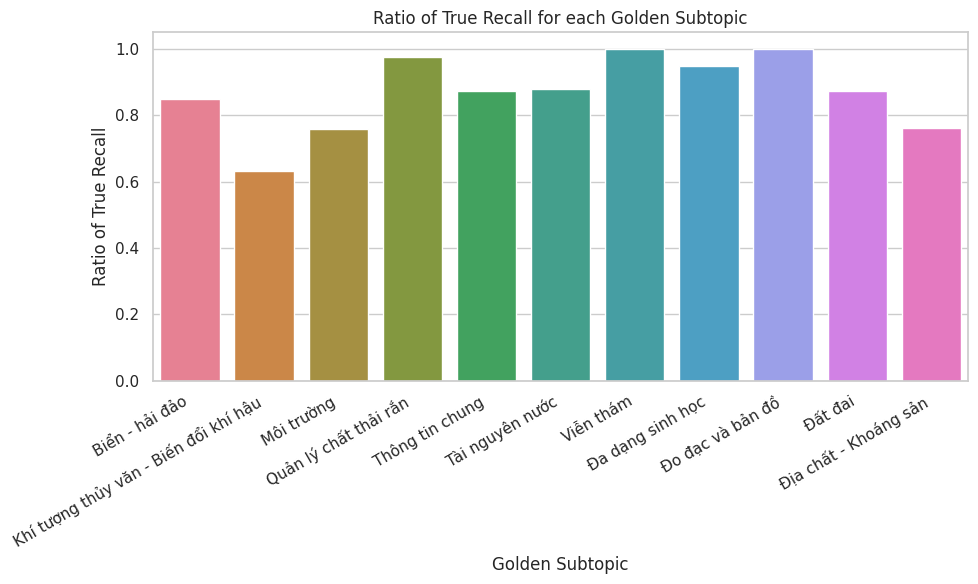

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Create the bar plot with different colors for each column
sns.barplot(x='golden_subtopic', y='RatioTrue', data=result_df, palette='husl')

# Rotate x-axis labels for better readability
plt.xticks(rotation=30, ha='right')

# Add labels and title
plt.xlabel('Golden Subtopic')
plt.ylabel('Ratio of True Recall')
plt.title('Ratio of True Recall for each Golden Subtopic')

# Show plot
plt.tight_layout()
plt.show()

In [ ]:
df.head(1)

,Links,Tieu_de,Description,Noi_dung_tin_bai,golden_subtopic,subtopic,frequency,frq_golden_subtopic,Is_in,is_in
0,https://baotainguyenmoitruong.vn/cong-nghe-vie...,Công nghệ viễn thám giám sát rác thải nhựa ven...,Cục Viễn thám quốc gia đang triển khai xây dựn...,Việt Nam đứng thứ 4/20 quốc gia thải nhiều rác...,Biển - hải đảo,"[Viễn thám, Biển - hải đảo, Môi trường, Chất t...","[27, 30, 64, 92]",30.0,True,NaN
